# **1. Perkenalan Dataset**


###**Clustering Pola Pembelian Pelanggan**

**Dataset Overview**

Beverage Sales Dataset adalah kumpulan data yang mencatat pola transaksi penjualan dalam industri minuman. Dataset ini mencakup 8.999.910 transaksi, terdiri dari pelanggan Business-to-Business (B2B) dan Business-to-Consumer (B2C).Dengan cakupan data yang luas, dataset ini memungkinkan berbagai analisis, termasuk segmentasi pelanggan, identifikasi kebiasaan belanja, dan strategi pemasaran berbasis data.

**Key Features**

- **Order_ID**	: ID unik untuk setiap pesanan (tidak digunakan dalam clustering).
- **Customer_ID**	: ID unik pelanggan (digunakan sebagai referensi tetapi tidak dalam modeling).
- **Customer_Type** :	Jenis pelanggan yaitu B2B (Business to Business) atau B2C (Business to Customer).
- **Product** :	Nama produk yang dibeli.
- **Category**	Kategori produk.
- **Unit_Price** :	Harga per unit produk.
- **Quantity** :	Jumlah unit produk yang dibeli dalam satu transaksi.
- **Discount** :	Diskon yang diberikan (hanya berlaku untuk pelanggan B2B).
- **Total_Price** :	Total harga setelah diskon diterapkan.
- **Region** :	Wilayah pelanggan.
- Order_Date :	Tanggal transaksi.

**Tujuan Clustering**

* Mengelompokkan pelanggan berdasarkan pola pembelian mereka.
* Menganalisis karakteristik pelanggan untuk memahami segmen pasar.
* Mengidentifikasi pelanggan bernilai tinggi.
* Membantu strategi pemasaran, seperti penawaran khusus berdasarkan segmentasi pelanggan.

**Sumber Data**

Sumber dataset: [baverage-sales](https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, kita akan memuat dataset yang disimpan di Google Drive ke dalam notebook. Karena dataset berbentuk CSV, kita akan menggunakan pustaka pandas untuk membacanya. Karena kita bekerja di Google Colab, langkah pertama adalah menghubungkan Google Drive agar dataset bisa diakses langsung dari penyimpanan kita.

In [2]:
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/DatasetBS/synthetic_beverage_sales_data.csv"
df_salesbav= pd.read_csv(file_path)
df_salesbav.head()

Mounted at /content/drive


,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, akan dilakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**1.Memahami Struktur Data**

- Tinjau jumlah baris dan kolom dalam dataset.
- Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

**2. Menangani Data yang Hilang**
- Identifikasi dan analisis data yang hilang (missing values). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

**3. Analisis Distribusi dan Korelasi**

- Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.
- Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

**4. Visualisasi Data**

- Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.
- Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.


Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


**4.1 Memahami Struktur Data**

- Tinjau jumlah baris dan kolom dalam dataset.

- Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [3]:
print(f"Dataset memiliki {df_salesbav.shape[0]} baris dan {df_salesbav.shape[1]} kolom.")

Dataset memiliki 8999910 baris dan 11 kolom.


In [4]:
df_salesbav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


Berdasarkan hasil pengamatan struktur data di atas, terdapat beberapa poin yang dapat disimpulkan sebagai berikut.

- Dataset memiliki 8.999.910 entri dan 11 kolom. Ini adalah dataset yang cukup besar, sehingga pengelolaan memori dan efisiensi pemrosesan menjadi perhatian utama.
- Tipe data terdiri dari:
   
   **7 kolom bertipe object** (Order_ID, Customer_ID, Customer_Type, Product, Category, Region, dan Order_Date) yang kemungkinan besar berisi data kategorikal atau teks.

   **4 kolom numerik bertipe float64** (Unit_Price, Discount, Total_Price, Order_Date ) yang menunjukkan nilai harga atau diskon.

  

In [5]:
df_salesbav = df_salesbav.sample(n=100000, random_state=69, ignore_index=True)
df_salesbav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order_ID       100000 non-null  object 
 1   Customer_ID    100000 non-null  object 
 2   Customer_Type  100000 non-null  object 
 3   Product        100000 non-null  object 
 4   Category       100000 non-null  object 
 5   Unit_Price     100000 non-null  float64
 6   Quantity       100000 non-null  int64  
 7   Discount       100000 non-null  float64
 8   Total_Price    100000 non-null  float64
 9   Region         100000 non-null  object 
 10  Order_Date     100000 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 8.4+ MB


Melakukan pengambilan sample dataset secara acak dikarenakan dataset yang dipakai memiliki jumlah baris terlalu besar, sehingga untuk mengefisiensi proses maka disini saya mengambil jumlah sample sebanyak 100.000 dari 8999910 row data.

**4.2 Menangani Data yang Hilang**

Identifikasi dan analisis data yang hilang (missing values). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

In [6]:
missing_data = df_salesbav.isnull().sum().reset_index()
missing_data.columns = ['Column', 'Missing Count']
missing_data['Missing Percentage'] = (missing_data['Missing Count'] / len(df_salesbav)) * 100
print(missing_data)

           Column  Missing Count  Missing Percentage
0        Order_ID              0                 0.0
1     Customer_ID              0                 0.0
2   Customer_Type              0                 0.0
3         Product              0                 0.0
4        Category              0                 0.0
5      Unit_Price              0                 0.0
6        Quantity              0                 0.0
7        Discount              0                 0.0
8     Total_Price              0                 0.0
9          Region              0                 0.0
10     Order_Date              0                 0.0


Berdasarkan hasil yang ditampilkan, tidak terdapat missing value atau data yang hilang. Sehingga tidak diperlukan tindak lanjut untuk mengatasinya.

**4.3 Analisis Distribusi dan Korelasi**

Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.

Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

In [7]:
df_salesbav.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.773509,23.236670,0.030060,132.579773
std,14.552819,26.929755,0.044981,524.241820
min,0.320000,1.000000,0.000000,0.320000
25%,1.050000,6.000000,0.000000,8.400000
50%,1.750000,11.000000,0.000000,21.140000
75%,3.210000,31.000000,0.050000,70.212500
max,159.800000,100.000000,0.150000,12817.750000


Berdasarkan hasil ringkasan statistik deslkriptif dapat disimpulkan bahwa :

1. **Unit_Price** (Harga Satuan per Produk):
   - **mean (rata-rata):** 5.77 → Harga rata-rata produk yang dijual adalah sekitar 5.77.
   - **std (standar deviasi):** 14.55 → Harga satuan bervariasi cukup tinggi.
   - **min (minimum):** 0.32 → Produk termurah seharga 0.32.
   - **max (maksimum):** 159.80 → Produk termahal seharga 159.80.
   - **percentiles (25%, 50%, 75%):** Sebagian besar produk berada di kisaran harga antara 1.05 hingga 3.21.

2. **Quantity** (Jumlah Produk yang Dibeli per Transaksi):
   - **mean:** 23.23 → Rata-rata jumlah produk dalam satu transaksi adalah sekitar 23 item.
   - **std:** 26.92 → Ada variasi yang cukup besar dalam jumlah produk yang dibeli.
   - **min:** 1 → Setidaknya ada satu transaksi dengan pembelian 1 item.
   - **max:** 100 → Pembelian terbesar dalam satu transaksi mencapai 100 item.

3. **Discount** (Diskon yang Diberikan per Transaksi):
   - **mean:** 0.030 → Rata-rata diskon yang diberikan adalah 3%.
   - **std:** 0.044 → Variasi diskon cukup kecil.
   - **min:** 0.000 → Ada transaksi tanpa diskon.
   - **max:** 0.150 → Diskon maksimal yang diberikan adalah 15%.

4. **Total_Price** (Total Harga per Transaksi):
   - **mean:** 132.58 → Rata-rata nilai transaksi adalah sekitar 132.58.
   - **std:** 524.24 → Variasi total harga transaksi sangat besar.
   - **min:** 0.32 → Transaksi terkecil senilai 0.32.
   - **max:** 12,817.75 → Transaksi terbesar mencapai 12,817.75.
   - **percentiles (25%, 50%, 75%):** Mayoritas transaksi berada dalam rentang 8.40 hingga 70.21.

Jadi bisa disimpulkan bahwa:
- Sebagian besar produk memiliki harga rendah, tetapi ada beberapa yang sangat mahal.
- Banyak pelanggan membeli dalam jumlah besar per transaksi.
- Diskon yang diberikan relatif kecil, dengan rata-rata sekitar 3%.
- Total transaksi memiliki distribusi yang sangat lebar, dengan beberapa transaksi bernilai sangat tinggi.


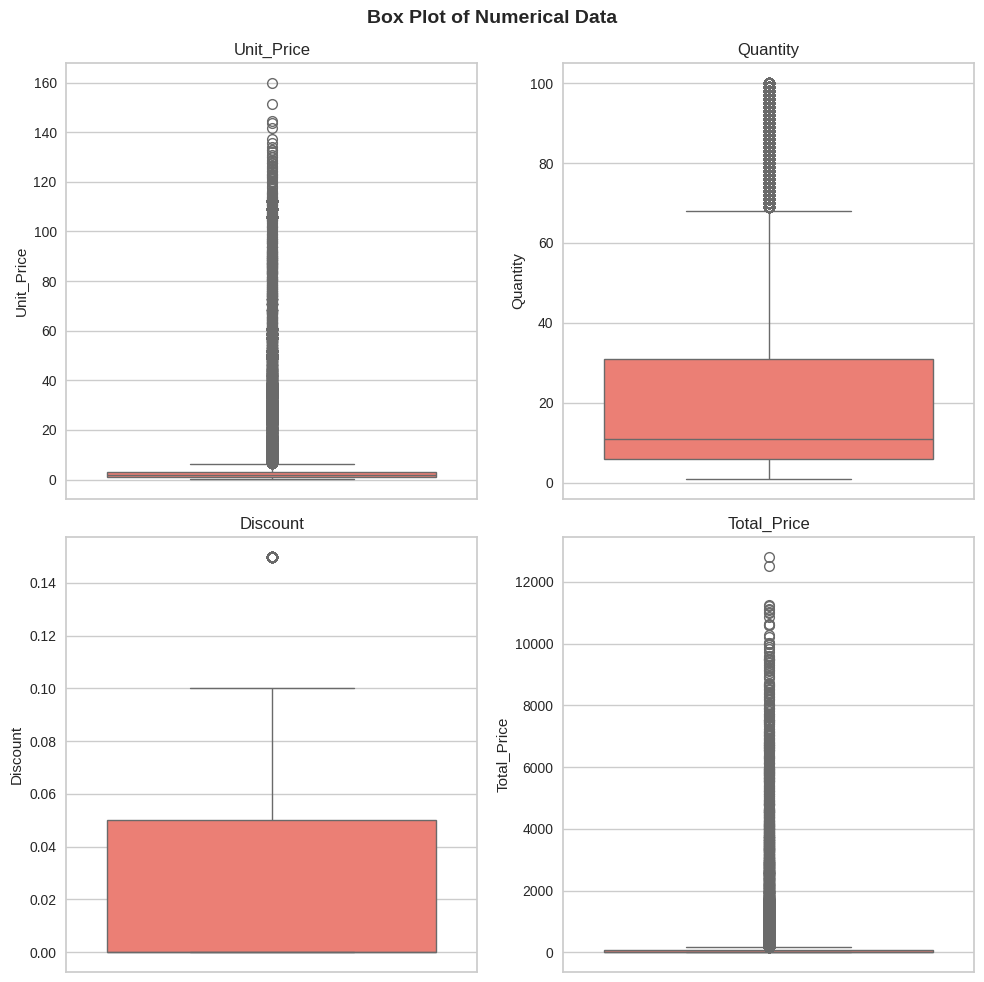

In [8]:
# visualisasi boxplot untuk variabel numerik
num_col = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, col in enumerate(num_col):
    sns.boxplot(y=df_salesbav[col], ax=axes[i//2, i%2], color='#FF6F61')
    axes[i//2, i%2].set_title(f"{col}")

plt.suptitle("Box Plot of Numerical Data", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Gambar yang kamu unggah menampilkan **box plot** untuk variabel numerik dalam dataset transaksi e-commerce. Berikut adalah interpretasi dari setiap plot:

**Unit_Price (Harga Satuan)**
   - Sebagian besar harga produk berada di dekat nilai rendah.
   - Banyak outlier dengan harga yang sangat tinggi (di atas 100), menunjukkan bahwa beberapa produk memiliki harga jauh lebih mahal dibandingkan yang lain.

**Quantity (Jumlah Barang yang Dibeli)**
   - Distribusi jumlah barang cukup lebar, dengan median sekitar 10-20 item per transaksi.
   - Outlier signifikan di atas 80-100, menunjukkan adanya pembelian dalam jumlah besar.

**Discount (Diskon)**
   - Sebagian besar transaksi mendapatkan diskon kecil (di bawah 5%).
   - Ada beberapa outlier, yaitu transaksi yang mendapatkan diskon besar (sekitar 10-15%).

**Total_Price (Total Harga per Transaksi)**
   - Sebagian besar transaksi berada di kisaran harga rendah.
   - Banyak outlier di atas 4000, menunjukkan adanya beberapa transaksi dengan total nilai yang sangat tinggi.

**Kesimpulan**
- Terdapat banyak outlier di semua variabel, terutama pada `Unit_Price`, `Quantity`, dan `Total_Price`, yang menunjukkan adanya transaksi ekstrem.
- Sebagian besar data berkumpul di rentang bawah, sementara beberapa transaksi memiliki nilai yang jauh lebih tinggi.
- Diskon cenderung kecil, dengan beberapa transaksi yang mendapatkan diskon lebih besar.

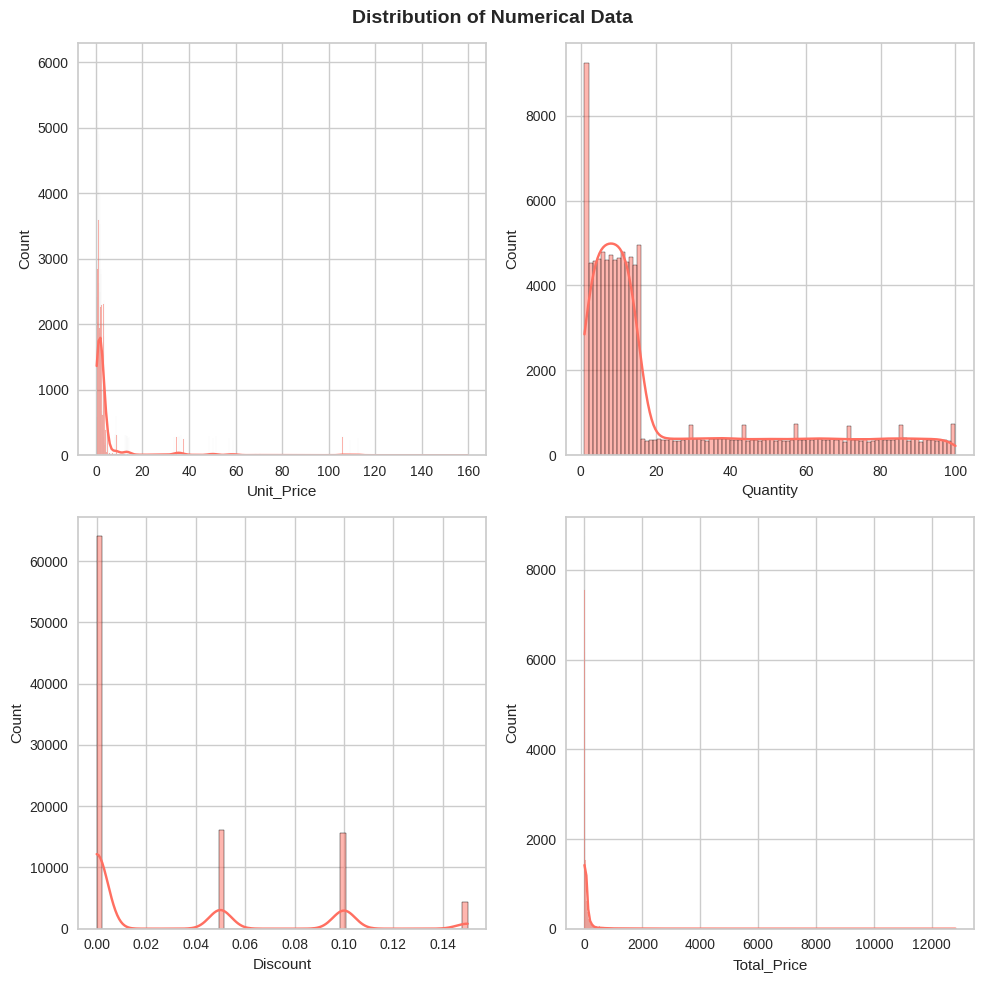

In [9]:
# visualisasi histogram untuk variabel numerik
num_col = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, col in enumerate(num_col):
    sns.histplot(df_salesbav[col], ax=axes[i//2, i%2], kde=True,
                 color='#FF6F61', line_kws={'color': "#1F77B4"})

plt.suptitle("Distribution of Numerical Data", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Berdasarkan histogram yang ditampilkan dapat diketahui bahwa:

- `Unit Price`: Distribusinya sangat skewed ke kanan, berarti sebagian besar produk memiliki harga rendah, dengan sedikit yang memiliki harga tinggi.

- `Quantity`: Skewed juga ke kanan, menunjukkan sebagian besar pesanan memiliki jumlah unit yang rendah, dengan beberapa pesanan besar.

- `Discount`: Mayoritas pesanan tidak memiliki diskon (nilai 0), tapi ada beberapa titik dengan diskon tertentu.

- `Total Price`: Polanya mirip Unit Price, artinya kebanyakan pesanan memiliki nilai transaksi kecil, dan ada beberapa pesanan dengan harga sangat tinggi.

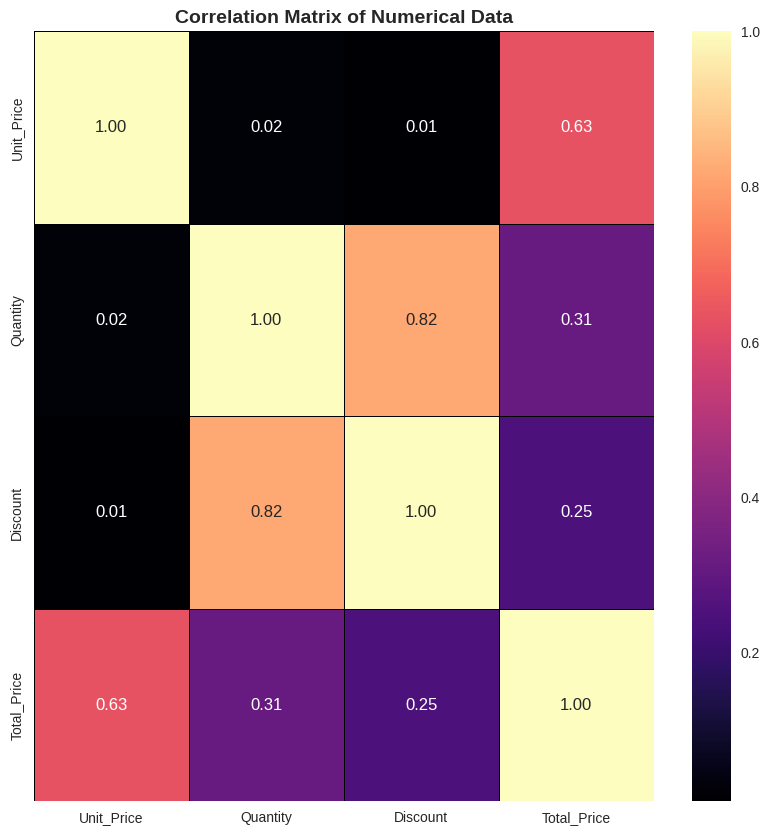

In [10]:
# Periksa hubungan antara variabel menggunakan matriks korelasi
plt.figure(figsize=(10, 10))
correlation_matrix = df_salesbav[num_col].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=0.5, linecolor='black')

plt.title('Correlation Matrix of Numerical Data', fontsize=14, fontweight='bold')
plt.show()


- **Unit Price vs Total Price (0.63)** → Korelasi **positif sedang**: Harga satuan yang lebih tinggi cenderung menghasilkan total transaksi yang lebih besar.
- **Quantity vs Discount (0.82)** → Korelasi **kuat**: Semakin banyak jumlah barang yang dibeli, semakin besar kemungkinan mendapatkan diskon.
- **Quantity vs Total Price (0.31)** → Korelasi **lemah-moderat**: Semakin banyak barang yang dibeli, total harga cenderung lebih tinggi, tetapi korelasinya tidak terlalu kuat.
- **Discount vs Total Price (0.25)** → Korelasi **rendah**: Pemberian diskon tidak terlalu berpengaruh terhadap total harga transaksi.
- **Unit Price vs Quantity (0.02)** → Korelasi **hampir nol**: Tidak ada hubungan signifikan antara harga satuan dan jumlah barang yang dibeli.
- **Discount vs Unit Price (0.01)** → Korelasi **sangat rendah**: Diskon tidak dipengaruhi oleh harga satuan.

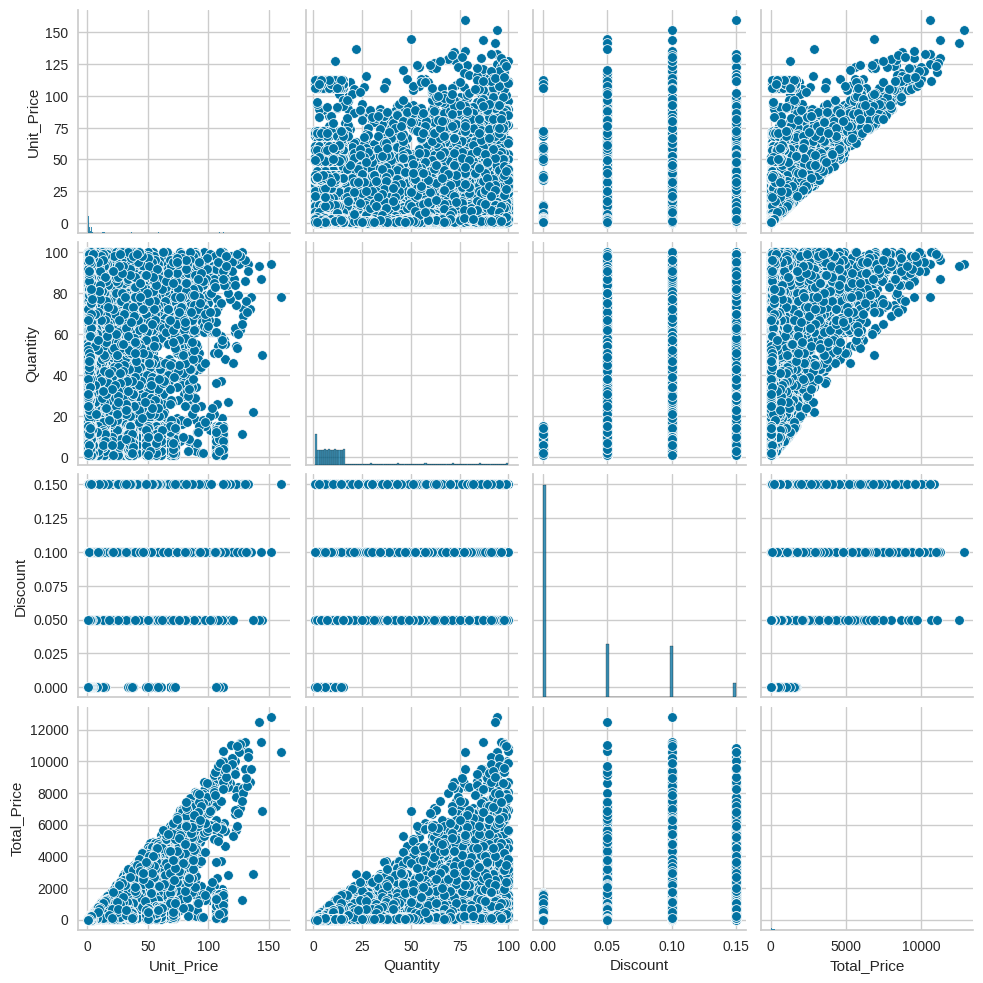

In [11]:
# Periksa hubungan antara variabel menggunakan scatter plot.
sns.pairplot(df_salesbav[num_col])
plt.show()

**Analisis Hubungan Antar Variabel:**

- ``Unit Price`` vs ``Total Price``

    Terlihat pola linier positif dimana menunjukkan semakin tinggi harga satuan, semakin tinggi total harga transaksi. Namun, terdapat beberapa outlier dengan harga satuan tinggi tetapi total harga rendah.

- ``Quantity`` vs ``Total Price``

    Hubungan linier positif dimana semakin banyak jumlah barang yang dibeli, semakin tinggi total harga transaksi. Selain itu, terdapat beberapa titik data dengan quantity tinggi tetapi total harga tidak terlalu besar yang mungkin dipengaruhi oleh diskon.

- ``Discount`` vs ``Total Price``

    Tidak terlihat pola yang jelas dimana artinya diskon tidak terlalu berpengaruh secara langsung terhadap total harga transaksi.

- ``Quantity`` vs ``Discount``

    Ada indikasi bahwa semakin banyak quantity, semakin tinggi kemungkinan mendapatkan diskon (sesuai dengan heatmap korelasi sebelumnya).

**Distribusi Variabel**  
   - Histogram diagonal menunjukkan distribusi masing-masing variabel.
   - ``Unit Price`` dan ``Total Price`` memiliki distribusi **right-skewed** (banyak transaksi bernilai rendah, hanya sedikit yang tinggi).
   - ``Quantity`` memiliki distribusi cukup merata tetapi terdapat beberapa titik ekstrim.


**4.4 Visualisasi Data**

Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.

Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

**Distribusi Category**

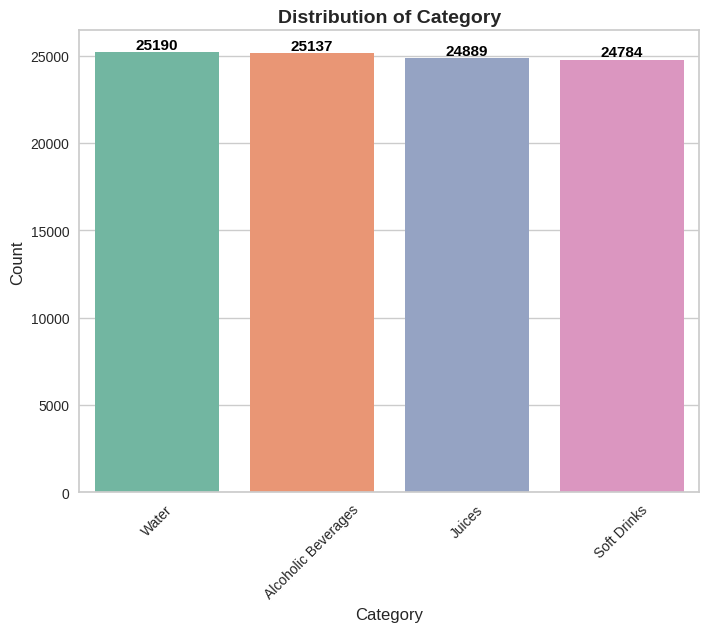

In [12]:
plt.figure(figsize=(8, 6))
category_count = df_salesbav['Category'].value_counts()
ax = sns.barplot(x=category_count.index, y=category_count.values, hue=category_count.index, palette='Set2', legend=False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Category', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.show()

Berdasarkan visualisasi diatas dapat diketahui bahwa :

- Distribusi kategori relatif seimbang, dengan jumlah produk di setiap kategori berkisar antara 24.784 hingga 25.190.

- Kategori "Water" memiliki jumlah terbanyak (25.190 unit), sedangkan kategori "Soft Drinks" memiliki jumlah paling sedikit (24.784 unit).

- Perbedaan jumlah antar kategori tidak terlalu signifikan, menunjukkan bahwa setiap kategori memiliki hampir jumlah yang sama dalam dataset ini.

**Distribusi Customer_Type**

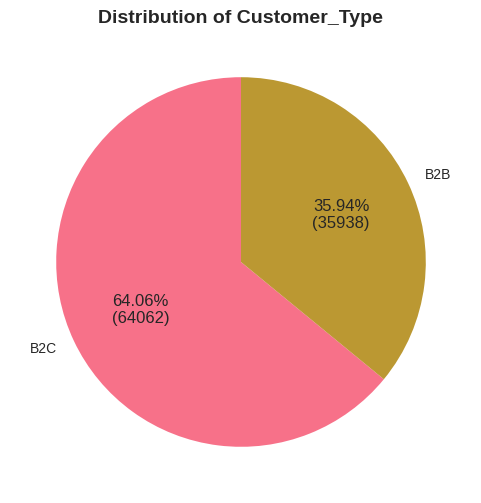

In [13]:
plt.figure(figsize=(6, 6))
customer_type_count = df_salesbav['Customer_Type'].value_counts()
def func(pct, all_vals):
    absolute = int(round(pct/100.*sum(all_vals)))
    return "{:.2f}%\n({:d})".format(pct, absolute)

plt.pie(customer_type_count,
        labels=customer_type_count.index,
        autopct=lambda pct: func(pct, customer_type_count),
        startangle=90,
        colors=sns.color_palette('husl'))

plt.title('Distribution of Customer_Type', fontsize=14, weight='bold')
plt.show()

Visualisasi diatas menunjukkan distribusi pelanggan berdasarkan tipe pelanggan ``Customer_Type``. Berikut adalah analisisnya:
   - **B2C (Business to Consumer)**: Sebagian besar pelanggan berasal dari kategori ini.
   - **B2B (Business to Business)**: Lebih sedikit dibandingkan B2C.
   - **B2C memiliki jumlah sebanyak 64.06%** dari total pelanggan, dengan **jumlah 64.062 pelanggan**.
   - **B2B memiliki porsi 35.94%** dari total pelanggan, dengan **jumlah 35.938 pelanggan**.

**Distribusi Region**

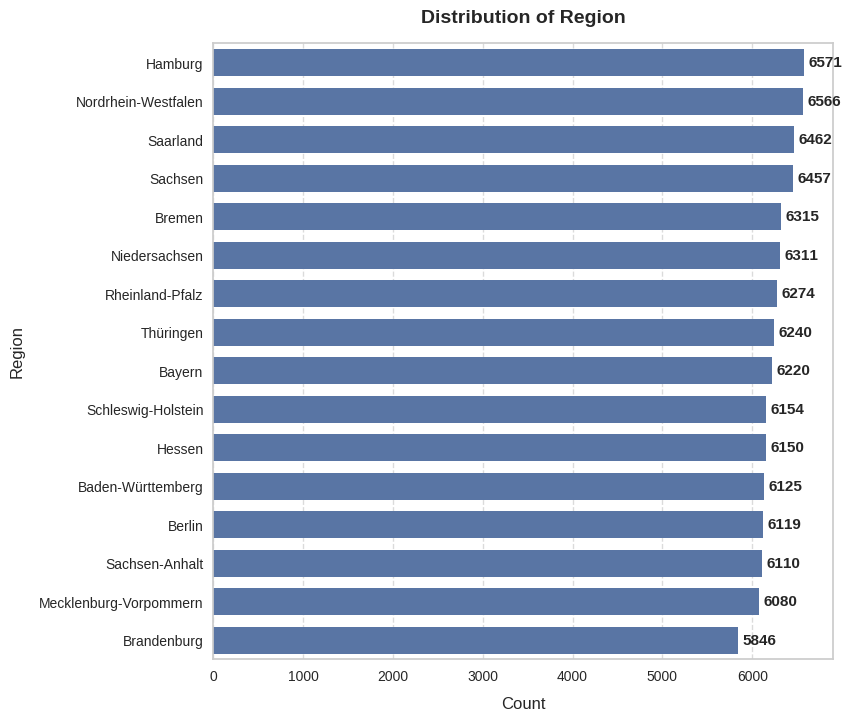

In [14]:
region_count = df_salesbav['Region'].value_counts()
plt.figure(figsize=(8, len(region_count) * 0.5))
ax = sns.barplot(x=region_count.values, y=region_count.index, color='#4C72B0', width=0.7)
for index, value in enumerate(region_count.values):
    plt.text(value + 50, index, str(value), va='center', fontsize=11, fontweight='bold')
plt.title('Distribution of Region', fontsize=14, weight='bold', pad=15)
plt.xlabel('Count', fontsize=12, labelpad=10)
plt.ylabel('Region', fontsize=12, labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Berdasarkan hasil visualisasi dapat diketahui bahwa :

- **Region dengan transaksi terbanyak** adalah **Hamburg** (6,571 transaksi).  
- **Region dengan transaksi paling sedikit** adalah **Brandenburg** (5,846 transaksi).  
- **Distribusi transaksi cukup merata**, dengan selisih transaksi tertinggi dan terendah sekitar **725 transaksi**.  
- **Lima besar region dengan transaksi tertinggi:**  
   1. **Hamburg:** 6,571 transaksi  
   2. **Nordrhein-Westfalen:** 6,566 transaksi  
   3. **Saarland:** 6,462 transaksi  
   4. **Sachsen:** 6,457 transaksi  
   5. **Bremen:** 6,315 transaksi  

Sehingga dapat diambil kesimpulan bahwa tidak ada perbedaan yang signifikan dalam jumlah transaksi antar region, meskipun beberapa wilayah memiliki transaksi yang sedikit lebih tinggi.

**Distribusi Produk**

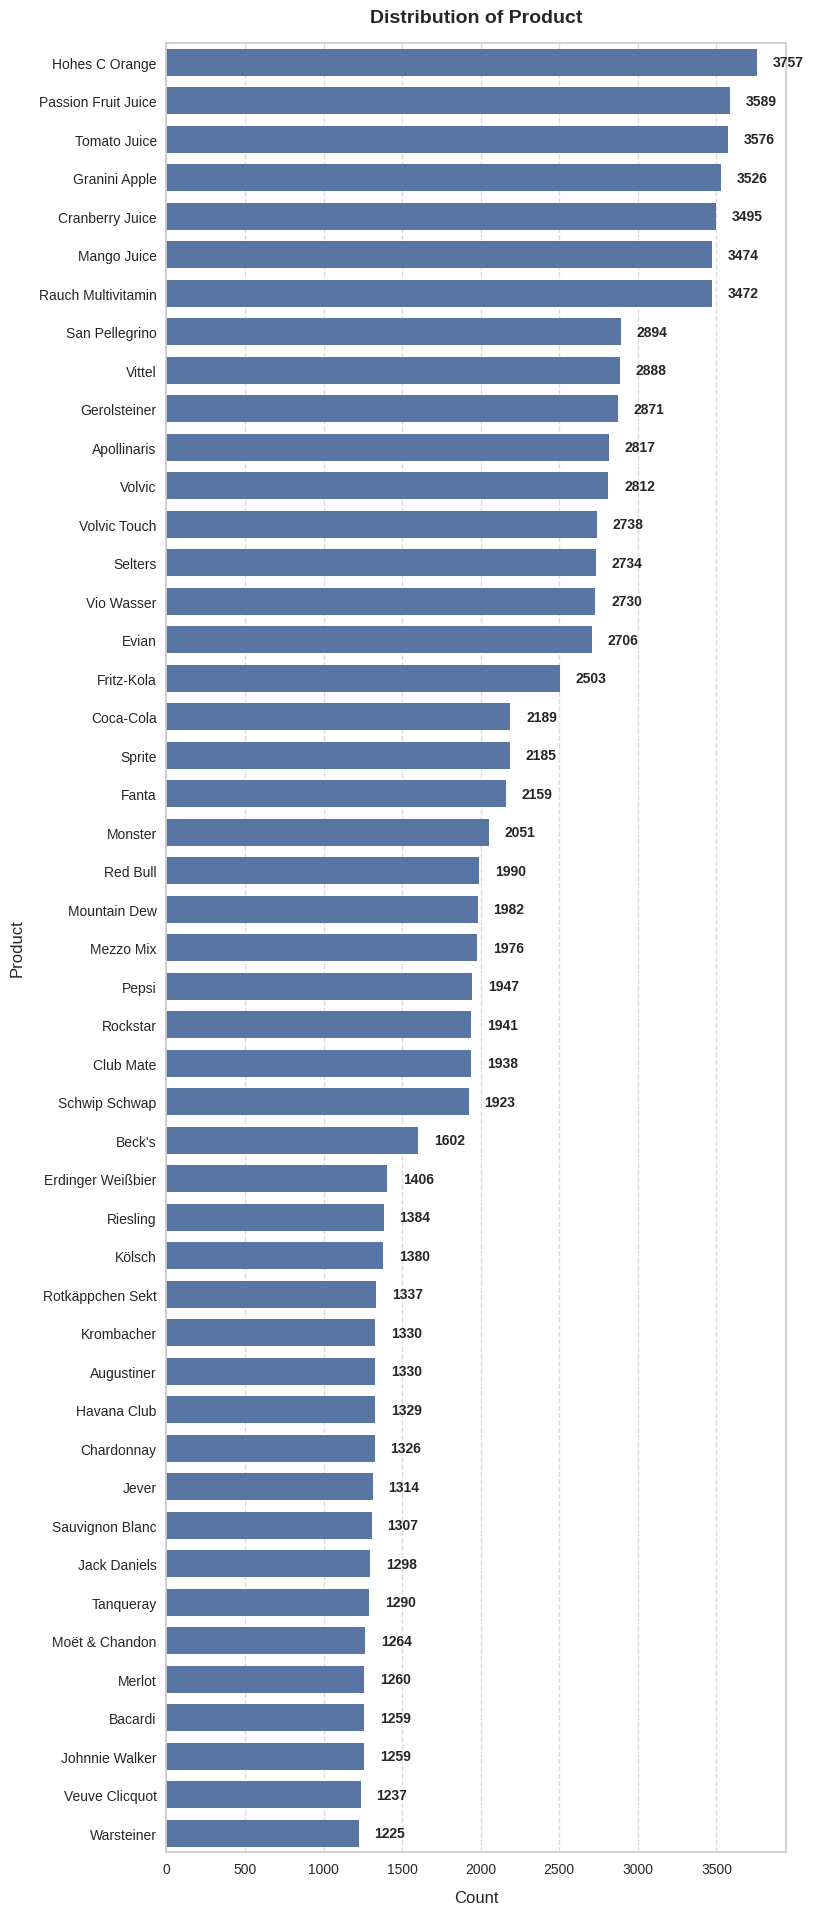

In [15]:
product_count = df_salesbav['Product'].value_counts()

plt.figure(figsize=(8, len(product_count) * 0.5))
ax = sns.barplot(x=product_count.values, y=product_count.index, color='#4C72B0', width=0.7)
for i, v in enumerate(product_count.values):
    plt.text(v + 100, i, str(v), va='center', fontsize=10, fontweight='bold')
plt.title('Distribution of Product', fontsize=14, weight='bold', pad=15)
plt.xlabel('Count', fontsize=12, labelpad=10)
plt.ylabel('Product', fontsize=12, labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Berdasarkan hasil visualisasi dapat disimpulkan bahwa :
1. **Produk Terlaris**  
   - Produk dengan jumlah transaksi tertinggi adalah **Hohes C Orange** dengan **3.757 transaksi**.
   - Produk lain dengan transaksi tinggi termasuk **Passion Fruit Juice (3.589 transaksi)**, **Tomato Juice (3.576 transaksi)**, dan **Granini Apple (3.526 transaksi)**.
   - Produk berbasis jus mendominasi daftar teratas, menunjukkan tingginya permintaan terhadap minuman sehat.

2. **Produk dengan Penjualan Menengah**  
   - Produk air mineral seperti **San Pellegrino (2.894 transaksi)**, **Vittel (2.888 transaksi)**, dan **Gerolsteiner (2.871 transaksi)** memiliki angka penjualan yang cukup tinggi.
   - Minuman ringan seperti **Coca-Cola (2.189 transaksi)**, **Sprite (2.185 transaksi)**, dan **Fanta (2.159 transaksi)** masih cukup diminati tetapi tidak termasuk dalam kategori paling laris.

3. **Produk dengan Penjualan Terendah**  
   - Produk dengan transaksi terendah dalam daftar adalah **Warsteiner (1.225 transaksi)**, **Veuve Clicquot (1.237 transaksi)**, dan **Johnnie Walker (1.259 transaksi)**.
   - Produk-produk dalam kategori ini mayoritas merupakan minuman beralkohol, yang mungkin memiliki pasar yang lebih spesifik atau terbatas.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

**5.1 Menghapus atau Menangani Data Kosong (Missing Values)**

In [16]:
missing_data = df_salesbav.isnull().sum().reset_index()
missing_data.columns = ['Column', 'Missing Count']
missing_data['Missing Percentage'] = (missing_data['Missing Count'] / len(df_salesbav)) * 100
missing_columns = missing_data[missing_data['Missing Count'] > 0]

if missing_columns.empty:
    print("Tidak terdapat missing value pada dataset.")
else:
    print("Terdapat missing value pada kolom berikut:")
    print(missing_columns)

Tidak terdapat missing value pada dataset.


**5.2 Menghapus Data Duplikat**

In [17]:
duplicate_count = df_salesbav.duplicated().sum()
if duplicate_count > 0:
    print(f"Terdapat {duplicate_count} data duplikat!")
else:
    print("Tidak ada data duplikat dalam dataset")

Tidak ada data duplikat dalam dataset


**5.3 Normalisasi atau Standarisasi Fitur**

In [18]:
min_max_scaler = MinMaxScaler()
df_normalize = df_salesbav.copy()
df_normalize[['Quantity']] = min_max_scaler.fit_transform(df_normalize[['Quantity']])
df_normalize.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,0.060606,0.00,7.28,Bremen,2021-02-17
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,0.454545,0.10,29.39,Sachsen-Anhalt,2023-04-15
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,2.90,0.727273,0.05,201.11,Sachsen,2022-06-20
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,0.292929,0.05,76.38,Schleswig-Holstein,2021-09-07
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,0.020202,0.00,2.73,Hessen,2023-04-28


Normalisasi dengan MinMaxScaler digunakan untuk mengubah skala fitur menjadi antara 0 hingga 1, seperti yang diterapkan pada kolom `Quantity`.

In [19]:
# Standarisasi
standard_scaler = StandardScaler()
df_standarisasi= df_normalize.copy()
df_standarisasi[['Total_Price', 'Unit_Price']] = standard_scaler.fit_transform(df_standarisasi[['Total_Price', 'Unit_Price']])
df_standarisasi.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,-0.325266,0.060606,0.00,-0.239013,Bremen,2021-02-17
1,ORD1118443,CUS7797,B2B,Selters,Water,-0.347942,0.454545,0.10,-0.196837,Sachsen-Anhalt,2023-04-15
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,-0.197455,0.727273,0.05,0.130723,Sachsen,2022-06-20
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,-0.212572,0.292929,0.05,-0.107203,Schleswig-Holstein,2021-09-07
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,-0.334199,0.020202,0.00,-0.247692,Hessen,2023-04-28


Standardisasi dengan StandardScaler digunakan untuk mengubah data menjadi distribusi dengan mean = 0 dan standar deviasi = 1, diterapkan pada `Total_Price` dan `Unit_Price`.

**5.4 Deteksi dan Penanganan Outlier**

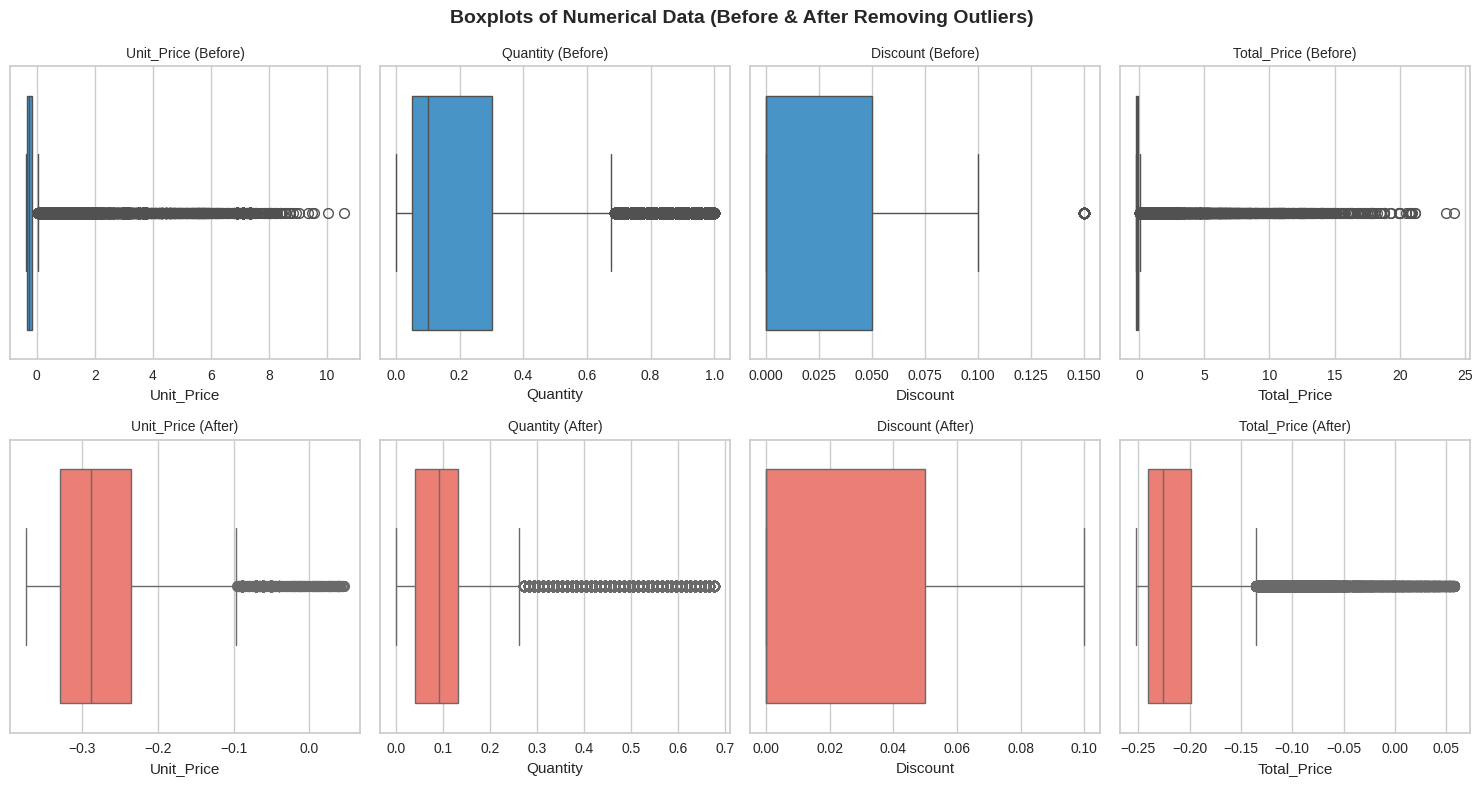

Total data sebelum menghapus outlier sebanyak 100000
Total data yang tersisa setelah menghapus outlier adalah  75948


In [20]:
# Menentukan batas outlier dengan IQR
Q1 = df_standarisasi[num_col].quantile(0.25)
Q3 = df_standarisasi[num_col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus outlier
mask = ~((df_standarisasi [num_col] < lower_bound) | (df_standarisasi[num_col] > upper_bound)).any(axis=1)
df_clean = df_standarisasi[mask]

# Visualisasi Boxplot Sebelum & Sesudah Menghapus Outlier
fig, axes = plt.subplots(2, len(num_col), figsize=(15, 8))

for i, col in enumerate(num_col):
    # Sebelum menghapus outlier
    sns.boxplot(x=df_standarisasi[col], ax=axes[0, i], color='#3498db')
    axes[0, i].set_title(f"{col} (Before)", fontsize=10)
    # Setelah menghapus outlier
    sns.boxplot(x=df_clean[col], ax=axes[1, i], color='#FF6F61')
    axes[1, i].set_title(f"{col} (After)", fontsize=10)

plt.suptitle("Boxplots of Numerical Data (Before & After Removing Outliers)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# Menampilkan jumlah data sebelum & setelah outlier removal
print("Total data sebelum menghapus outlier sebanyak", df_standarisasi.shape[0])
print("Total data yang tersisa setelah menghapus outlier adalah ", df_clean.shape[0])



1. **Keberadaan Outlier Sebelum Penghapusan**  
   - Pada boxplot bagian atas (Before), terlihat bahwa hampir semua fitur numerik seperti **Unit_Price, Quantity, Discount, dan Total_Price** memiliki banyak outlier, yang ditandai dengan titik-titik di luar whisker boxplot.
   - Outlier ini bisa disebabkan oleh data ekstrem, kesalahan input, atau distribusi yang sangat skewed.

2. **Setelah Menghapus Outlier**  
   - Pada boxplot bagian bawah (After), jumlah outlier berkurang secara signifikan.
   - Distribusi data menjadi lebih kompak dan tidak memiliki nilai ekstrem yang terlalu jauh dari interquartile range (IQR).
   - Namun, beberapa fitur seperti **Total_Price** dan **Quantity** masih menunjukkan distribusi yang cukup lebar, tetapi dengan lebih sedikit pencilan.

3. **Dampak Penghapusan Outlier terhadap Dataset**  
   - Jumlah total data sebelum menghapus outlier adalah **100.000**, sedangkan setelah menghapus outlier tersisa **75.943** data.
   - Ini berarti sekitar **24% data dihapus** karena dianggap sebagai outlier.
   - Penghapusan ini dapat meningkatkan kualitas analisis dengan mengurangi pengaruh nilai ekstrem, tetapi juga perlu dipertimbangkan apakah ada informasi penting yang ikut terhapus.

**5.5 Encoding Data Kategorikal**

In [21]:
# Inisialisasi label encoding
label_encoding = LabelEncoder()
df_label = df_clean.copy()
df_label[['Category', 'Region', 'Product']] = df_clean[['Category', 'Region', 'Product']].apply(label_encoding.fit_transform)

# one-hot encoding
df_encoding = pd.get_dummies(df_label, columns=['Customer_Type'])
df_encoding.head()

,Order_ID,Customer_ID,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Customer_Type_B2B,Customer_Type_B2C
0,ORD697566,CUS6363,5,2,-0.325266,0.060606,0.00,-0.239013,4,2021-02-17,False,True
1,ORD1118443,CUS7797,32,3,-0.347942,0.454545,0.10,-0.196837,13,2023-04-15,True,False
3,ORD1437128,CUS6393,20,2,-0.212572,0.292929,0.05,-0.107203,14,2021-09-07,True,False
4,ORD562794,CUS4090,29,3,-0.334199,0.020202,0.00,-0.247692,6,2023-04-28,False,True
5,ORD2320519,CUS5936,2,0,-0.299841,0.030303,0.00,-0.242141,4,2023-11-01,False,True


**Keterangan :**

1. **Label Encoding**  
   - Fitur kategorikal **Category, Region, dan Product** dikonversi menjadi bentuk numerik menggunakan **Label Encoding**.
   - Hasilnya, setiap kategori dalam fitur tersebut direpresentasikan dengan angka, misalnya:  
     - `"Soft Drinks"` bisa menjadi `0`, `"Water"` bisa menjadi `1`, dll.
     - `"Bremen"` bisa menjadi `3`, `"Sachsen-Anhalt"` menjadi `13`, dll.  

2. **One-Hot Encoding**  
   - Fitur **Customer_Type** dikonversi menggunakan **One-Hot Encoding**, menghasilkan kolom baru:
     - `Customer_Type_B2B` (False/True)
     - `Customer_Type_B2C` (False/True)


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [22]:
features = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price',
            'Customer_Type_B2B', 'Customer_Type_B2C']
X = df_encoding[features]

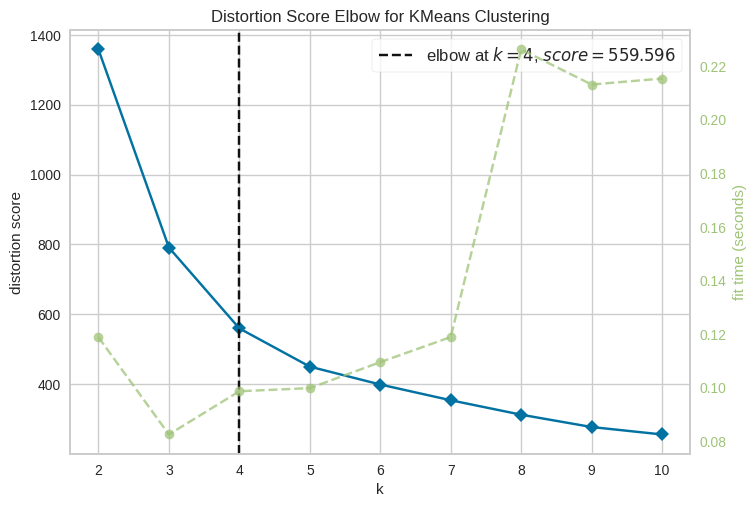

In [23]:
kmeans = KMeans(random_state=69)
visualizer = KElbowVisualizer(kmeans, k=(2, 11))
visualizer.fit(X)
visualizer.show()
optimal_k = visualizer.elbow_value_

In [24]:
pca = PCA(n_components=2, random_state=69)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(75948, 2)


**Melatih Model K-Means dengan Jumlah Cluster Optimal**

In [25]:
kmeans = KMeans(n_clusters=int(optimal_k), random_state=69, init='k-means++')
kmeans.fit(X_pca)

KMeans(n_clusters=4, random_state=69)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [26]:
hasil_silhouette = silhouette_score(X_pca, kmeans.labels_)
print(f'Hasil dari silhouette score untuk K={optimal_k} adalah {hasil_silhouette}')

Hasil dari silhouette score untuk K=4 adalah 0.865686355985184


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [27]:
# Mengambil kolom numerik
df_num = df_encoding.select_dtypes(include=[np.number])

# Menghitung korelasi kolom numerik
correlation_matrix = df_num.corr()

# Memilih fitur Total_Price dengan korelasi lebih dari 0.1
selected_feature = correlation_matrix['Total_Price'][abs(correlation_matrix['Total_Price']) > 0.1].index.tolist()
selected_feature.remove('Total_Price')
X_selected = df_encoding[selected_feature]

In [28]:
# Mereduksi jika masih banyak fitur
reduk_pca = PCA(n_components=2, random_state=69)
X_pca_select = reduk_pca.fit_transform(X_selected)

# Clustering ulang menggunakan cluster optimal
kmeans_selected = KMeans(n_clusters=optimal_k, random_state=69, init='k-means++')
kmeans_selected.fit(X_pca_select)

# Cek Silhouette Score Terbaru
silhouette_score_new = silhouette_score(X_pca_select, kmeans_selected.labels_)
print(f'Silhouette Score setelah Feature Selection (K={optimal_k}): {silhouette_score_new}')

Silhouette Score setelah Feature Selection (K=4): 0.8618697132926538


In [29]:
print(f'Silhouette Score SEBELUM Feature Selection: {hasil_silhouette}')
print(f'Silhouette Score SESUDAH Feature Selection: {silhouette_score_new}')

Silhouette Score SEBELUM Feature Selection: 0.865686355985184
Silhouette Score SESUDAH Feature Selection: 0.8618697132926538


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

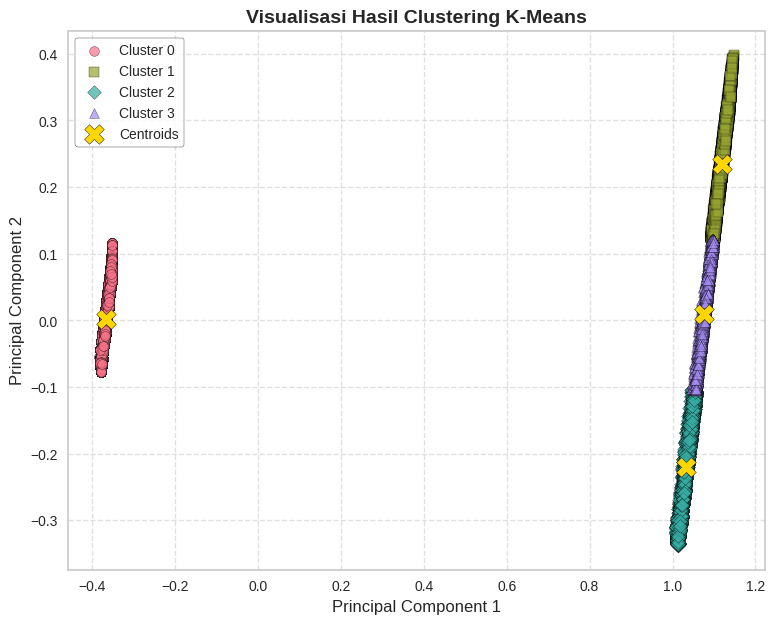

In [30]:
markers = ['o', 's', 'D', '^']
palette = sns.color_palette("husl", n_colors=4)

plt.figure(figsize=(9, 7))

for cluster in range(4):
    plt.scatter(
        X_pca[kmeans.labels_ == cluster, 0],
        X_pca[kmeans.labels_ == cluster, 1],
        label=f'Cluster {cluster}',
        c=[palette[cluster]],
        marker=markers[cluster],
        edgecolors='black',
        alpha=0.7
    )

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c='gold',
    marker='X',
    s=200,
    edgecolors='black',
    label='Centroids'
)

plt.title('Visualisasi Hasil Clustering K-Means', fontsize=14, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='best', frameon=True, edgecolor='black')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.


**Menambahkan Hasil Dari Clustering Setelah Mengatasi Outlier**

In [31]:
df_label = df_clean.copy()
df_label['Cluster'] = kmeans.labels_
display(df_label)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,-0.325266,0.060606,0.00,-0.239013,Bremen,2021-02-17,0
1,ORD1118443,CUS7797,B2B,Selters,Water,-0.347942,0.454545,0.10,-0.196837,Sachsen-Anhalt,2023-04-15,3
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,-0.212572,0.292929,0.05,-0.107203,Schleswig-Holstein,2021-09-07,3
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,-0.334199,0.020202,0.00,-0.247692,Hessen,2023-04-28,0
5,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,-0.299841,0.030303,0.00,-0.242141,Bremen,2023-11-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99992,ORD1812777,CUS3819,B2C,Club Mate,Soft Drinks,-0.241433,0.131313,0.00,-0.192545,Baden-Württemberg,2023-06-27,0
99993,ORD2196324,CUS5310,B2C,Granini Apple,Juices,-0.287472,0.050505,0.00,-0.234702,Hamburg,2021-05-16,0
99995,ORD1452106,CUS3607,B2C,Fanta,Soft Drinks,-0.317020,0.050505,0.00,-0.239623,Niedersachsen,2021-03-29,0
99997,ORD1440760,CUS7275,B2C,Mezzo Mix,Soft Drinks,-0.353439,0.000000,0.00,-0.251698,Saarland,2023-10-15,0


**Mengubah Kembali Data Numerik Seperti Sebelum Dilakukan Normalisasi dan Standardisasi**

In [32]:
df_label[['Quantity']] = min_max_scaler.inverse_transform(df_label[['Quantity']])
df_label[['Total_Price', 'Unit_Price']] = standard_scaler.inverse_transform(df_label[['Total_Price', 'Unit_Price']])
display(df_label)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen,2021-02-17,0
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt,2023-04-15,3
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein,2021-09-07,3
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen,2023-04-28,0
5,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen,2023-11-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99992,ORD1812777,CUS3819,B2C,Club Mate,Soft Drinks,2.26,14.0,0.00,31.64,Baden-Württemberg,2023-06-27,0
99993,ORD2196324,CUS5310,B2C,Granini Apple,Juices,1.59,6.0,0.00,9.54,Hamburg,2021-05-16,0
99995,ORD1452106,CUS3607,B2C,Fanta,Soft Drinks,1.16,6.0,0.00,6.96,Niedersachsen,2021-03-29,0
99997,ORD1440760,CUS7275,B2C,Mezzo Mix,Soft Drinks,0.63,1.0,0.00,0.63,Saarland,2023-10-15,0


**Menghitung Jumlah Data Tiap Cluster**

In [33]:
data_per_cluster = df_label['Cluster'].value_counts()
print(data_per_cluster)

Cluster
0    56636
2     6877
3     6604
1     5831
Name: count, dtype: int64


**Visualisasi Distribusi Cluster**

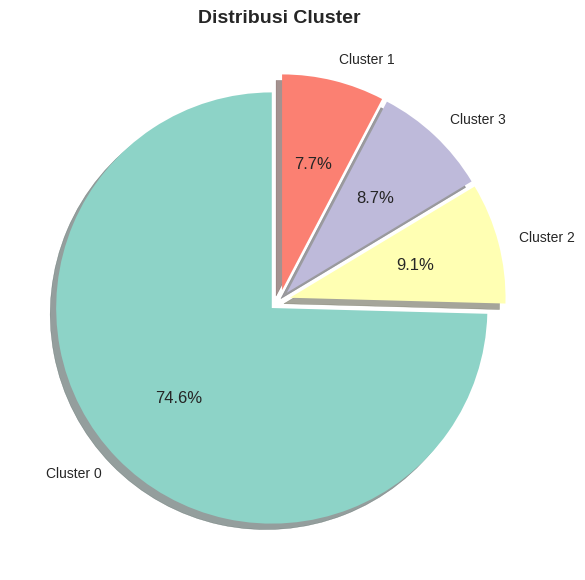

In [34]:
colors = plt.cm.Set3.colors

plt.figure(figsize=(7, 7))
labels = [f'Cluster {i}' for i in data_per_cluster.index]
plt.pie(
    data_per_cluster,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=[0.05] * len(data_per_cluster),
    shadow=True
)
plt.title('Distribusi Cluster', fontsize=14, fontweight='bold')
plt.show()

**Menganalisis Karakteristik Setiap Cluster Berdasarkan Rata-ata (mean), median, dan modus (mode)**

In [35]:
mean_val = df_label.select_dtypes(include=['number']).groupby('Cluster').mean()
median_val = df_label.select_dtypes(include=['number']).groupby('Cluster').median()
modus_val = df_label.select_dtypes(include=['number']).groupby('Cluster').agg(lambda x: x.mode().iloc[0])

print("==== Mean Values ====")
display(mean_val)

print("\n==== Median Values ====")
display(median_val)

print("\n==== Mode Values ====")
display(modus_val)

==== Mean Values ====


,Unit_Price,Quantity,Discount,Total_Price
Cluster,,,,
0,1.844884,7.988188,0.000000,14.748905
1,1.625586,55.823701,0.078760,82.099283
2,1.532740,11.820125,0.059721,16.249724
3,1.608660,33.914749,0.066626,49.194571



==== Median Values ====


,Unit_Price,Quantity,Discount,Total_Price
Cluster,,,,
0,1.61,8.0,0.00,11.160
1,1.44,56.0,0.10,74.900
2,1.21,12.0,0.05,12.170
3,1.32,34.0,0.05,42.605



==== Mode Values ====


,Unit_Price,Quantity,Discount,Total_Price
Cluster,,,,
0,0.96,6.0,0.00,12.48
1,1.01,50.0,0.10,60.48
2,0.64,2.0,0.05,13.68
3,0.65,30.0,0.05,29.92


**Melakukan Grouping Berdasarkan `Cluster` dan `Customer_Type`**

In [36]:
Groupping_Cluster_and_CustomerType = df_label.groupby(['Cluster', 'Customer_Type']).size().unstack(fill_value=0)
display(Groupping_Cluster_and_CustomerType)

Customer_Type,B2B,B2C
Cluster,,
0,0,56636
1,5831,0
2,6877,0
3,6604,0


**Visualisasi Grouping Berdasarkan `Cluster` dan `Customer_Type`**

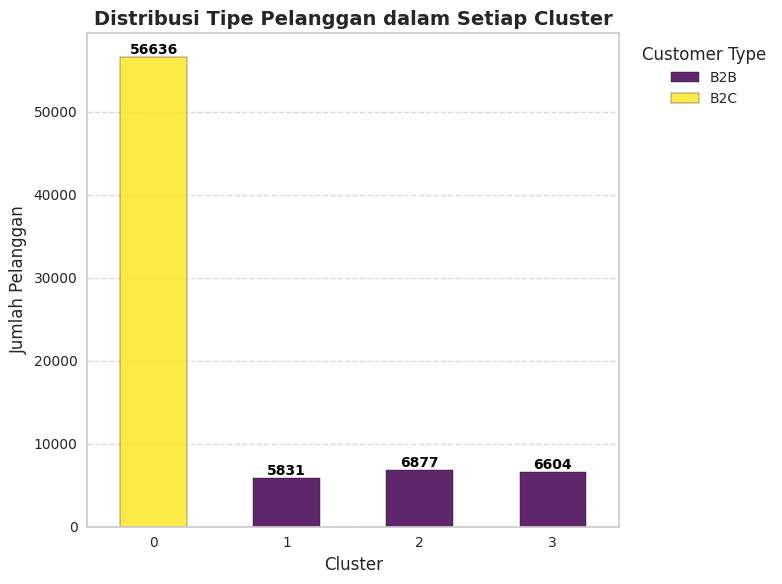

In [37]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
Groupping_Cluster_and_CustomerType.plot(
    kind='bar',
    stacked=True,
    colormap='viridis',
    edgecolor='black',
    alpha=0.85,
    ax=ax
)

ax.set_title('Distribusi Tipe Pelanggan dalam Setiap Cluster', fontsize=14, fontweight='bold')
ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Jumlah Pelanggan', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.xaxis.grid(False)
ax.legend(title='Customer Type', bbox_to_anchor=(1.02, 1), loc='upper left')
for container in ax.containers:
    labels = [f"{int(v)}" if v > 0 else "" for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black', weight='bold')
plt.tight_layout()
plt.show()

#**Analisis Karakteristik Cluster dari Model KMeans**

Berdasarkan hasil clustering menggunakan model KMeans, pelanggan dikelompokkan ke dalam empat cluster dengan karakteristik yang berbeda. Berikut adalah analisis mendalam untuk masing-masing cluster:

###  Cluster 0 - Potential Upsell Customers (Pelanggan Potensial untuk Ditingkatkan Pembeliannya)
- **Jumlah Pelanggan**: 56.636 pelanggan (paling besar dibanding cluster lain)
- **Rata-rata Harga Satuan**: 1,84 (tertinggi dibandingkan cluster lain)
- **Rata-rata Jumlah Pembelian**: 7,99 unit
- **Rata-rata Diskon**: 0% (tidak mendapatkan diskon)
- **Rata-rata Total Transaksi**: 14,75

**Analisis**:
Pelanggan di cluster ini mayoritas merupakan pembeli individu atau eceran yang melakukan pembelian dalam jumlah kecil tetapi membayar harga lebih tinggi karena tidak mendapatkan diskon. Mereka kemungkinan hanya membeli berdasarkan kebutuhan tanpa adanya pola pembelian yang signifikan.

**Strategi Bisnis**:
- Meningkatkan jumlah pembelian mereka dengan menawarkan program loyalitas atau diskon khusus untuk pembelian dalam jumlah lebih besar.
- Menggunakan strategi bundling produk untuk mendorong mereka membeli lebih banyak.
- Menawarkan promosi berbatas waktu agar mereka lebih sering melakukan pembelian.

---

###  Cluster 1 - Mid-Tier Business Clients (Pelanggan Bisnis Kelas Menengah)
- **Jumlah Pelanggan**: 5.831 pelanggan
- **Rata-rata Harga Satuan**: 1,63
- **Rata-rata Jumlah Pembelian**: 55,82 unit
- **Rata-rata Diskon**: 7,87% (tertinggi dibanding semua cluster)
- **Rata-rata Total Transaksi**: 82,09

**Analisis**:
Cluster ini terdiri dari pelanggan bisnis skala menengah yang mulai melakukan pembelian dalam jumlah lebih besar dibandingkan individu biasa. Mereka sudah menikmati diskon yang cukup signifikan, tetapi belum termasuk dalam kategori pembeli grosir utama.

**Strategi Bisnis**:
- Menawarkan diskon tambahan atau insentif jika mereka meningkatkan volume pembelian.
- Memberikan opsi pembayaran fleksibel seperti cicilan atau sistem kredit untuk mendorong pembelian lebih besar.
- Menjalin hubungan yang lebih erat dengan mereka melalui program membership atau layanan pelanggan eksklusif.

---

### Cluster 2 - Emerging Distributors (Calon Distributor yang Mulai Berkembang)
- **Jumlah Pelanggan**: 6.877 pelanggan
- **Rata-rata Harga Satuan**: 1,53
- **Rata-rata Jumlah Pembelian**: 11,82 unit
- **Rata-rata Diskon**: 5,97%
- **Rata-rata Total Transaksi**: 16,25

**Analisis**:
Cluster ini mencakup pelanggan yang mulai berkembang sebagai distributor kecil atau reseller. Mereka membeli dalam jumlah lebih banyak dibandingkan pelanggan individu tetapi masih dalam tahap awal untuk menjadi pembeli skala besar.

**Strategi Bisnis**:
- Mendorong mereka untuk meningkatkan pembelian dengan program volume-based discount (diskon berdasarkan jumlah pembelian).
- Menawarkan akses ke produk eksklusif jika mereka meningkatkan frekuensi pembelian.
- Memberikan pelatihan atau dukungan pemasaran untuk membantu mereka menjual kembali produk dengan lebih efektif.

---

###  Cluster 3 - VIP Wholesale Partners (Pelanggan Premium dalam Jumlah Besar)
- **Jumlah Pelanggan**: 6.604 pelanggan
- **Rata-rata Harga Satuan**: 1,61
- **Rata-rata Jumlah Pembelian**: 33,91 unit
- **Rata-rata Diskon**: 6,67%
- **Rata-rata Total Transaksi**: 49,19

**Analisis**:
Cluster ini terdiri dari pelanggan bisnis besar atau distributor utama yang melakukan pembelian dalam skala besar. Mereka mendapatkan harga khusus dan diskon tertinggi karena volume transaksi mereka yang signifikan.

**Strategi Bisnis**:
- Menjaga loyalitas mereka dengan memberikan layanan pelanggan eksklusif dan penawaran spesial.
- Menyediakan program kemitraan strategis agar mereka tetap membeli dalam jumlah besar.
- Memberikan keuntungan tambahan seperti prioritas stok atau pengiriman gratis dengan minimal jumlah pembelian untuk memperkuat hubungan bisnis.

---

### **Kesimpulan & Rekomendasi Strategi Bisnis**
Dari hasil clustering ini, dapat disimpulkan bahwa terdapat empat tipe pelanggan dengan kebutuhan dan pola pembelian yang berbeda. Oleh karena itu, strategi bisnis yang diterapkan juga harus disesuaikan dengan karakteristik masing-masing cluster:
1. **Potential Upsell Customers** → Fokus pada meningkatkan jumlah pembelian mereka dengan promo menarik dan bundle product.
2. **Mid-Tier Business Clients** → Meningkatkan frekuensi dan volume pembelian mereka dengan insentif.
3. **Emerging Distributors** → Membantu mereka berkembang dengan akses eksklusif dan dukungan pemasaran.
4. **VIP Wholesale Partners** → Memastikan kepuasan dan loyalitas mereka dengan layanan premium dan manfaat tambahan.

Dengan menerapkan strategi yang tepat berdasarkan karakteristik pelanggan dalam tiap cluster, bisnis dapat mengoptimalkan penjualan dan meningkatkan loyalitas pelanggan dalam jangka panjang.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [38]:
# Simpan hasil clustering ke dalam file CSV
df_label.to_csv('Dataset_clustering.csv', index=False)